# Problem Description:

In order to apply the concepts of the Feedforward Neural Network to a regression problem, we create a synthetic dataset that implements the sum of two cosines. The best part of working with synthetic data is the possibility to visualize the data, as well as the decision function created for the decision boundary by the model.

The notebook is organized as follows:

1. Imports
2. Dataset
3. Model
4. Evaluation

### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Dataset

In [5]:
# Generate the Dataset
# The data is uniformly distributed between (-3, +3)

N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

This function implements:

\begin{equation}
    y = \cos({2x_{1}}) + \cos({3x_{2}})
\end{equation}

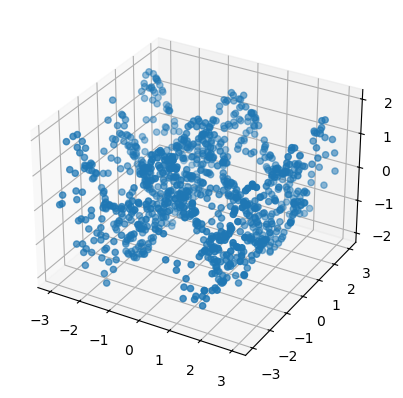

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], Y)

### Model

In [7]:
# Build Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape = (2, ), activation = "relu"),
    tf.keras.layers.Dense(1)
])

In [8]:
# Compile and Fit
# The learning rate is set to 0.01 

opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer = opt, loss = "mse")
r = model.fit(X, Y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9675
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9325
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9245
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9360
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8642
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8241
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7477
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7252
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6985
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6023
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5877
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5325
Epoch 13/100
32/32 [=================

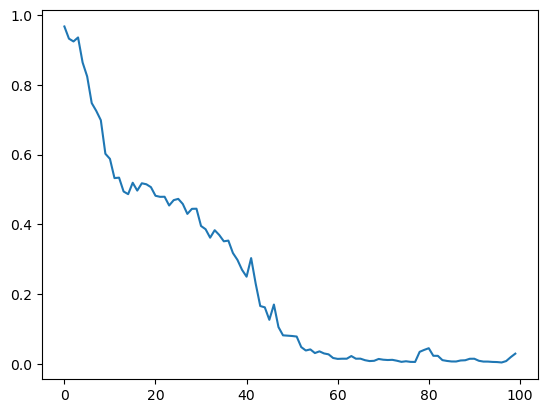

In [9]:
# Plot the Loss

plt.plot(r.history["loss"], label = "loss")

### Evaluation

79/79 [==============================] - 0s 1ms/step


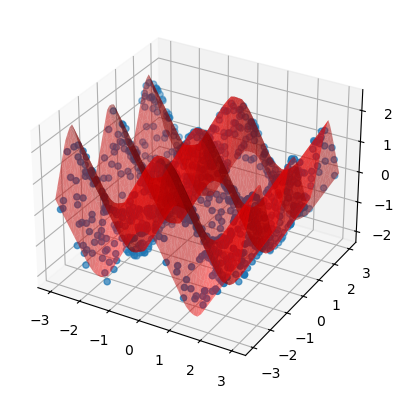

In [10]:
# We can also plot the prediction function to confirm that the ANN is able to aproximate the sum of cosines
# The np.linspace function returns evenly spaced numbers over a specified interval
# The np.meshgrid funtion returns the cross product between the specified points (returns a tuple of coordinate matrices from coordinate vectors) 
# Every X1 and X2 is paired up, and we assign these to the variables x0 and x1, which represents the 1st and the 2nd axis, respectively

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], Y)

line = np.linspace(-3, 3, 50)
x0, x1 = np.meshgrid(line, line)
x_grid = np.vstack((x0.flatten(), x1.flatten())).T
y_hat = model.predict(x_grid).flatten()
ax.plot_trisurf(x_grid[:, 0], x_grid[:, 1], y_hat, linewidth = 0.2, antialiased = True, color = "red", alpha = 0.5)
plt.show()

79/79 [==============================] - 0s 1ms/step


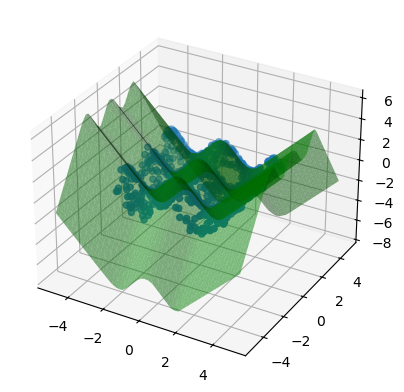

In [11]:
# Can the ANN generalize well for other surfaces?
# We will plot the original data along with the predictions for the new data, which ranges between (-5, +5)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], Y)

new_line = np.linspace(-5, 5, 50)
x0_new, x1_new = np.meshgrid(new_line, new_line)
x_grid_new = np.vstack((x0_new.flatten(), x1_new.flatten())).T
y_hat_new = model.predict(x_grid_new).flatten()
ax.plot_trisurf(x_grid_new[:, 0], x_grid_new[:, 1], y_hat_new, linewidth = 0.2, antialiased = True, color = "green", alpha = 0.5)
plt.show()

In [12]:
# We can see from the plot above that the ANN does not work on the new data, since it learned a cosine function over X1 and X2
# In this case, the ANN assumes that the pattern keeps going up in the edges